In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [102]:
data=sns.load_dataset("iris")
df=pd.DataFrame(data)
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [103]:
print(df.head())
# It will return the 5 rows from top

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [104]:
print(df.shape)
#It will return the number of rows and columns in the table

(150, 5)


In [105]:
print(df.info())
# It will return non-null count and data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [106]:
print(df.describe())
# It will give a description of the table

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [107]:
df.isnull()
#It will return true for null values in any column else return false

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [108]:
df.isnull().sum()
# It will count the sum of null values in each column.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [109]:
data=df.drop_duplicates(subset="species")
data
#If there is any duplicate value it will drop it.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [110]:
print(df.groupby("species").count())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa                50           50            50           50
versicolor            50           50            50           50
virginica             50           50            50           50


In [111]:
print(df.value_counts("species"))
#It will count the value for each of the species

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


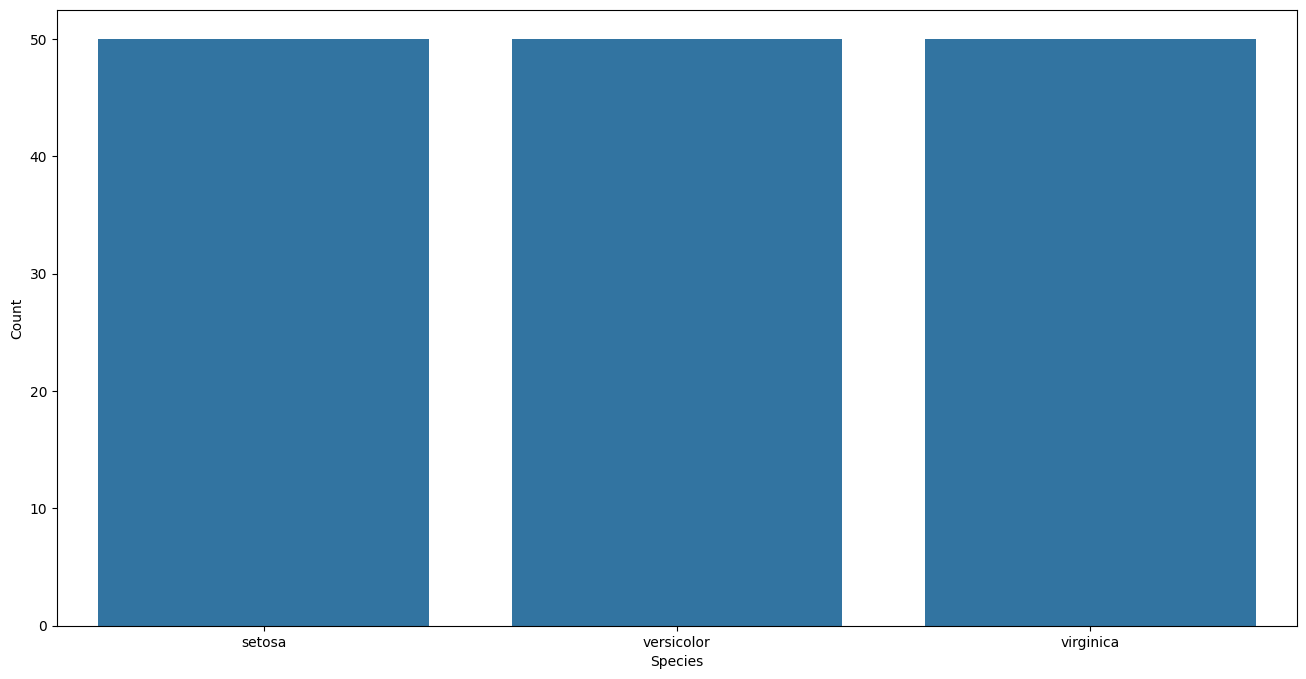

In [112]:
plt.figure(figsize=(16,8))
sns.countplot(x='species', data=df)
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [113]:
le=LabelEncoder()
le.fit(df["species"])

LabelEncoder()

In [114]:
df["species"]=pd.DataFrame(le.transform(df["species"]))
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


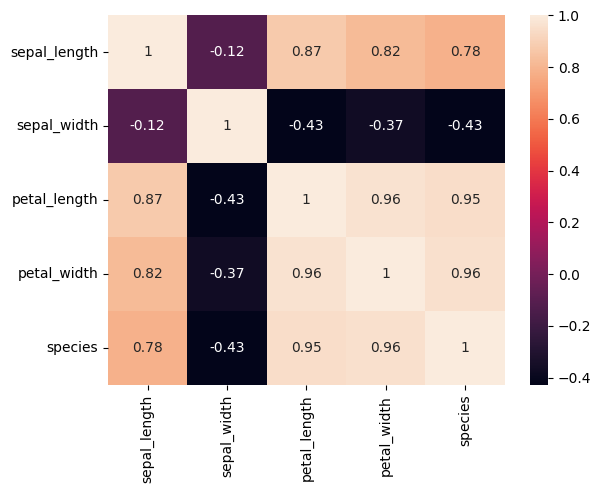

In [115]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

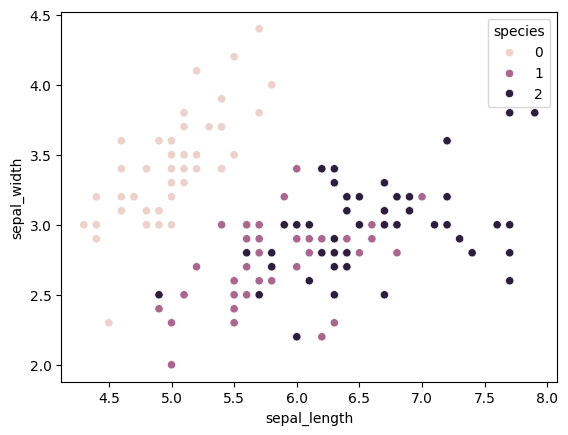

In [116]:
sns.scatterplot(data=df,x="sepal_length",y="sepal_width",hue="species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

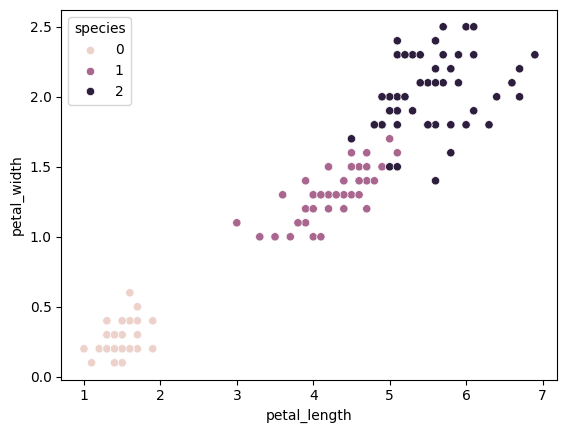

In [117]:
sns.scatterplot(data=df,x="petal_length",y="petal_width",hue="species")

In [118]:
x=df.iloc[:,2:-1]
y=df["species"]

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [121]:
lr.score(x_test,y_test)*100

100.0

In [122]:
from mlxtend.plotting import plot_decision_regions

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

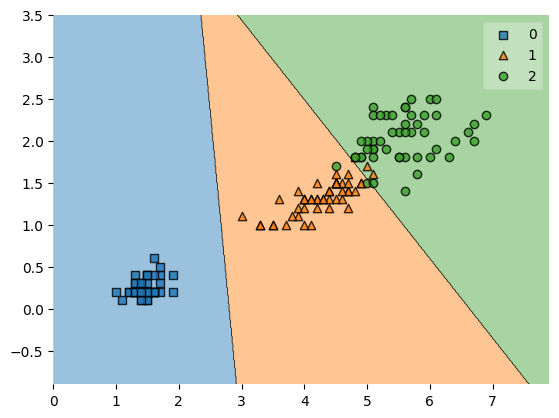

In [123]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),feature_index=(0,1),clf=lr)

In [124]:
lr.predict([[5.4,2.3]])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [152]:
x_in=df.iloc[:,0:2]
y_out=df["species"]

In [153]:
from sklearn.preprocessing import PolynomialFeatures

In [154]:
pf=PolynomialFeatures(degree=2)
pf.fit(x_in)

PolynomialFeatures()

In [155]:
x_in= pd.DataFrame(pf.transform(x_in))
x_in

,0,1,2,3,4,5
0,1.0,5.1,3.5,26.01,17.85,12.25
1,1.0,4.9,3.0,24.01,14.70,9.00
2,1.0,4.7,3.2,22.09,15.04,10.24
3,1.0,4.6,3.1,21.16,14.26,9.61
4,1.0,5.0,3.6,25.00,18.00,12.96
...,...,...,...,...,...,...
145,1.0,6.7,3.0,44.89,20.10,9.00
146,1.0,6.3,2.5,39.69,15.75,6.25
147,1.0,6.5,3.0,42.25,19.50,9.00
148,1.0,6.2,3.4,38.44,21.08,11.56


In [156]:
x_train,x_test,y_train,y_test=train_test_split(x_in,y_out,test_size=0.2,random_state=42)

In [157]:
lrg=LogisticRegression()
lrg.fit(x_train,y_train)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
lrg.score(x_test,y_test)*100

90.0

In [158]:
lrg.predict(x_in)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])